 # Introduction
-> Data science is the study of data. It involves developing methods of recording, storing, and analyzing data to effectively extract useful information.

-> The goal of data science is to gain insights and knowledge from any type of data — both structured and unstructured.

-> Data analysis is a process of inspecting, cleansing, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making.

-> Data mining is the process of analyzing hidden patterns of data according to different perspectives for categorization into useful information.

-> Artificial intelligence (AI) is the simulation of human intelligence processes by machines, especially computer systems. These processes include learning ,reasoning and self-correction.

-> Machine learning is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed.

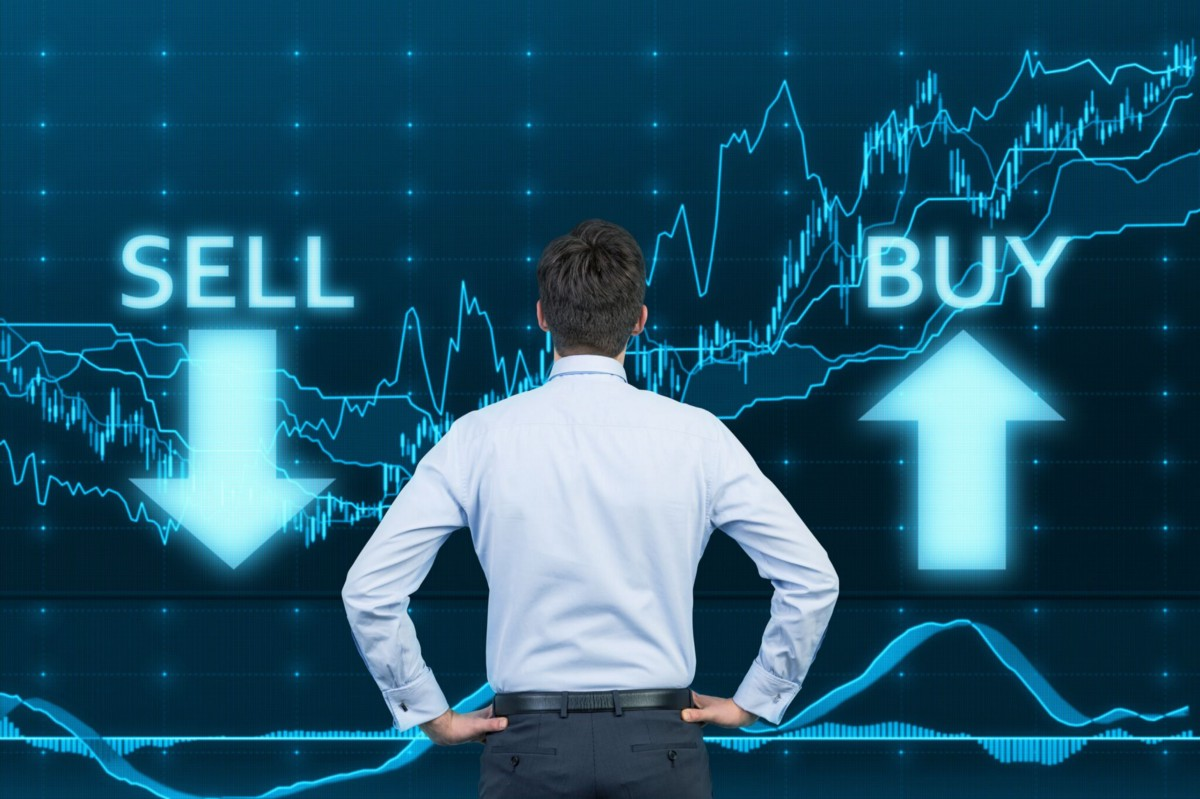

In [1]:
from IPython.display import Image
Image('bg.jpeg')

In [2]:
import os

# Pandas and Numpy
-> NumPy stands for ‘Numerical Python’ or ‘Numeric Python’. It is an open source module of Python which provides fast mathematical computation on arrays and matrices.

-> NumPy, Pandas is one of the most widely used python libraries in data science.

-> It provides high-performance, easy to use structures and data analysis tools. Unlike NumPy library which provides objects for multi-dimensional arrays, Pandas provides in-memory 2d table object called Dataframe. It is like a spreadsheet with column names and row labels.

In [3]:
# univariate lstm example
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [9]:
# Ask user for a stock quote
stock = input('Enter a stock name u need check : ').upper()

Enter a stock name u need check : sbin


In [10]:
print(stock)

SBIN


In [11]:
#df_train = pd.read_csv('Stock_Price_Train.csv')
df_train = pd.read_csv('data\A.csv')

In [12]:
df_train.shape

(1259, 7)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [14]:
df_train.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,49.187863,49.600059,48.782026,49.202025,2.338039e+06
std,9.244798,9.264168,9.197698,9.229804,1.400161e+06
min,33.180000,34.060000,33.115000,33.370000,5.328630e+05
25%,41.515000,41.870000,41.260000,41.560000,1.533018e+06
50%,46.640000,47.000000,46.341000,46.700000,2.003109e+06
75%,56.435000,56.935000,56.025000,56.495000,2.718401e+06
max,74.480000,75.000000,74.300000,74.820000,1.814641e+07


<AxesSubplot:>

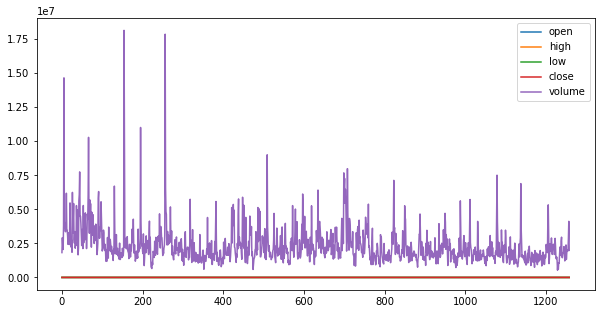

In [15]:
df_train.plot(figsize=(10,5))

In [16]:
# to get first N entreies
df_train.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,45.07,45.35,45.00,45.08,1824755,A
1,2013-02-11,45.17,45.18,44.45,44.60,2915405,A
2,2013-02-12,44.81,44.95,44.50,44.62,2373731,A
3,2013-02-13,44.81,45.24,44.68,44.75,2052338,A
4,2013-02-14,44.72,44.78,44.36,44.58,3826245,A


In [17]:
df_train.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,73.18,73.780,72.510,72.83,2008177,A
1255,2018-02-02,72.32,72.760,71.220,71.25,1955697,A
1256,2018-02-05,70.86,71.480,68.180,68.22,2860726,A
1257,2018-02-06,66.96,68.830,66.130,68.45,4121239,A
1258,2018-02-07,68.19,69.085,67.905,68.06,1988391,A


In [18]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
    X, y =[],[]
    for i in range(len(timeseries_data)):
        # find the end of this pattern
        end_ix = i + n_features
        # check if we are beyond the sequence
        if end_ix > len(timeseries_data)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [20]:
#dataset_train = pd.read_csv('Stock_Price_Train.csv')
training_set = df_train.iloc[:, 2].values
print(training_set,'\n', len(training_set))

[45.35  45.18  44.95  ... 71.48  68.83  69.085] 
 1259


In [19]:
df_train.iloc[:, 2]

0       45.350
1       45.180
2       44.950
3       45.240
4       44.780
         ...  
1254    73.780
1255    72.760
1256    71.480
1257    68.830
1258    69.085
Name: high, Length: 1259, dtype: float64

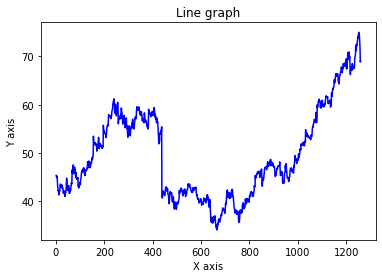

In [21]:
length = len(training_set)+1
x = np.arange(1,length)
y =  np.array(training_set)
#plt.style.use('fivethirtyeight')
# plotting
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.plot(x, y, color ="blue")

plt.show()

In [22]:
# define input sequence
timeseries_data = training_set 
# choose a number of time steps
n_steps = int(input("Enter your time duration:\n"))
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

Enter your time duration:
15


In [24]:
print(X),print(y)

[[45.35  45.18  44.95  ... 41.905 42.06  41.98 ]
 [45.18  44.95  45.24  ... 42.06  41.98  42.18 ]
 [44.95  45.24  44.78  ... 41.98  42.18  43.19 ]
 ...
 [71.86  72.47  72.31  ... 74.39  73.78  72.76 ]
 [72.47  72.31  72.5   ... 73.78  72.76  71.48 ]
 [72.31  72.5   73.215 ... 72.76  71.48  68.83 ]]
[42.18  43.19  43.52  ... 71.48  68.83  69.085]


(None, None)

In [25]:
X.shape

(1244, 15)

In [26]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

# Building LSTM Model

In [27]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=30, verbose=1)

Epoch 1/30
39/39 [==============================] - 7s 23ms/step - loss: 1068.8657
Epoch 2/30
39/39 [==============================] - 1s 25ms/step - loss: 1.9561
Epoch 3/30
39/39 [==============================] - 1s 25ms/step - loss: 1.2204
Epoch 4/30
39/39 [==============================] - 1s 24ms/step - loss: 0.9583
Epoch 5/30
39/39 [==============================] - 1s 24ms/step - loss: 0.9141
Epoch 6/30
39/39 [==============================] - 1s 24ms/step - loss: 0.7940
Epoch 7/30
39/39 [==============================] - 1s 24ms/step - loss: 0.6895
Epoch 8/30
39/39 [==============================] - 1s 24ms/step - loss: 0.7374
Epoch 9/30
39/39 [==============================] - 1s 25ms/step - loss: 0.7145
Epoch 10/30
39/39 [==============================] - 1s 25ms/step - loss: 0.6904
Epoch 11/30
39/39 [==============================] - 1s 25ms/step - loss: 0.7417
Epoch 12/30
39/39 [==============================] - 1s 24ms/step - loss: 0.7401
Epoch 13/30
39/39 [===============

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 15, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


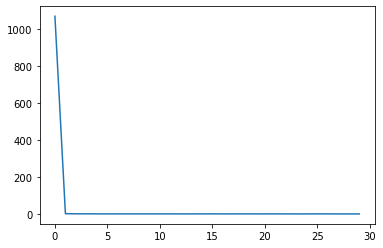

In [30]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

# Predicting For the next day

In [36]:
# demonstrate prediction for next 10 days
sample = timeseries_data[-15:]
x_input = np.array(sample)
temp_input=list(x_input)
lst_output=[]
i=0
while(i<100):
    
    if(len(temp_input)>15):
        x_input= np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=1)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[68.78242]
1 day input [73.215     73.55      74.075     73.86      74.49      74.83
 75.        74.08      74.39      73.78      72.76      71.48
 68.83      69.085     68.7824173]
1/1 [==============================] - 0s 30ms/step
1 day output [[68.67138]]
2 day input [73.55       74.075      73.86       74.49       74.83       75.
 74.08       74.39       73.78       72.76       71.48       68.83
 69.085      68.7824173  68.67137909]
1/1 [==============================] - 0s 33ms/step
2 day output [[68.43234]]
3 day input [74.075      73.86       74.49       74.83       75.         74.08
 74.39       73.78       72.76       71.48       68.83       69.085
 68.7824173  68.67137909 68.43234253]
1/1 [==============================] - 0s 38ms/step
3 day output [[67.89861]]
4 day input [73.86       74.49       74.83       75.         74.08       74.39
 73.78       72.76       71.48       68.83       69.085      68.7824173
 68.67137909 68.43234253 67.89861298]
1/1 [=======================

1/1 [==============================] - 0s 80ms/step
33 day output [[38.551193]]
34 day input [38.30892  37.533978 37.048706 36.719433 36.565666 36.66235  36.91459
 37.246708 37.59177  37.88899  38.099373 38.244564 38.35503  38.451923
 38.551193]
1/1 [==============================] - 0s 83ms/step
34 day output [[38.651596]]
35 day input [37.533978 37.048706 36.719433 36.565666 36.66235  36.91459  37.246708
 37.59177  37.88899  38.099373 38.244564 38.35503  38.451923 38.551193
 38.651596]
1/1 [==============================] - 0s 112ms/step
35 day output [[38.74517]]
36 day input [37.048706 36.719433 36.565666 36.66235  36.91459  37.246708 37.59177
 37.88899  38.099373 38.244564 38.35503  38.451923 38.551193 38.651596
 38.74517 ]
1/1 [==============================] - 0s 66ms/step
36 day output [[38.83484]]
37 day input [36.719433 36.565666 36.66235  36.91459  37.246708 37.59177  37.88899
 38.099373 38.244564 38.35503  38.451923 38.551193 38.651596 38.74517
 38.83484 ]
1/1 [============

1/1 [==============================] - 0s 86ms/step
67 day output [[41.539616]]
68 day input [40.341347 40.427696 40.513775 40.599678 40.68548  40.771194 40.856842
 40.942413 41.027905 41.113335 41.19874  41.284046 41.369278 41.454456
 41.539616]
1/1 [==============================] - 0s 77ms/step
68 day output [[41.62477]]
69 day input [40.427696 40.513775 40.599678 40.68548  40.771194 40.856842 40.942413
 41.027905 41.113335 41.19874  41.284046 41.369278 41.454456 41.539616
 41.62477 ]
1/1 [==============================] - 0s 72ms/step
69 day output [[41.709953]]
70 day input [40.513775 40.599678 40.68548  40.771194 40.856842 40.942413 41.027905
 41.113335 41.19874  41.284046 41.369278 41.454456 41.539616 41.62477
 41.709953]
1/1 [==============================] - 0s 91ms/step
70 day output [[41.795177]]
71 day input [40.599678 40.68548  40.771194 40.856842 40.942413 41.027905 41.113335
 41.19874  41.284046 41.369278 41.454456 41.539616 41.62477  41.709953
 41.795177]
1/1 [=========

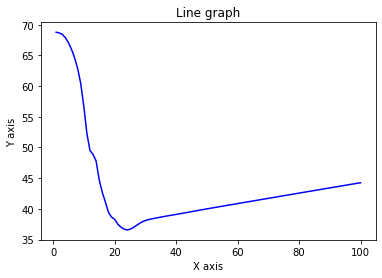

In [37]:
length = len(lst_output)+1
x = np.arange(1,length)
y =  np.array(lst_output)
# plotting
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="Blue")
plt.show()

In [38]:

open_price = df_train.iloc[:,1].values
day_high_price = df_train.iloc[:,2].values
day_low_price = df_train.iloc[:,3].values
print("open_price :",open_price,'\n', len(open_price),'\n',\
      "high_price :",day_high_price,'\n',len(day_high_price),'\n',\
      "low_price :",day_low_price,'\n',len(day_low_price))

open_price : [45.07 45.17 44.81 ... 70.86 66.96 68.19] 
 1259 
 high_price : [45.35  45.18  44.95  ... 71.48  68.83  69.085] 
 1259 
 low_price : [45.    44.45  44.5   ... 68.18  66.13  67.905] 
 1259


# RNN Model
Recurrent Neural Network
> Recurrent means the output at the current time step becomes the input to the next time step. At each element of the sequence, the model considers not just the current input, but what it remembers about the preceding elements.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
dataset = pd.read_csv('data\A.csv')

In [61]:
len(dataset)

1259

In [63]:
test_loc = len(dataset)-int(len(dataset)*0.2)
print(test_loc)

1008


In [64]:
train = dataset.iloc[:test_loc]
test = dataset.iloc[test_loc:]

In [65]:
 train.iloc[:, 2:3]

,high
0,45.35
1,45.18
2,44.95
3,45.24
4,44.78
...,...
1003,49.00
1004,49.47
1005,49.38
1006,49.78


In [66]:
training_set = train.iloc[:, 2:3].values
print(training_set)

[[45.35]
 [45.18]
 [44.95]
 ...
 [49.38]
 [49.78]
 [50.03]]


In [67]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [70]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(6,test_loc):
    X_train.append(training_set_scaled[i-6:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [71]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train,len(X_train))

[[[0.41568483]
  [0.40942563]
  [0.40095729]
  [0.41163476]
  [0.39469809]
  [0.37481591]]

 [[0.40942563]
  [0.40095729]
  [0.41163476]
  [0.39469809]
  [0.37481591]
  [0.33357879]]

 [[0.40095729]
  [0.41163476]
  [0.39469809]
  [0.37481591]
  [0.33357879]
  [0.3236377 ]]

 ...

 [[0.54363034]
  [0.53350515]
  [0.55541237]
  [0.57989691]
  [0.55007364]
  [0.5673785 ]]

 [[0.53350515]
  [0.55541237]
  [0.57989691]
  [0.55007364]
  [0.5673785 ]
  [0.5640648 ]]

 [[0.55541237]
  [0.57989691]
  [0.55007364]
  [0.5673785 ]
  [0.5640648 ]
  [0.57879234]]] 1002


In [72]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [74]:
# Part 2 - Building the RNN
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)


Epoch 1/10
32/32 [==============================] - 9s 11ms/step - loss: 0.1496
Epoch 2/10
32/32 [==============================] - 0s 15ms/step - loss: 0.0166
Epoch 3/10
32/32 [==============================] - 1s 19ms/step - loss: 0.0090
Epoch 4/10
32/32 [==============================] - 1s 16ms/step - loss: 0.0069
Epoch 5/10
32/32 [==============================] - 1s 17ms/step - loss: 0.0063: 0s - loss: 
Epoch 6/10
32/32 [==============================] - 1s 17ms/step - loss: 0.0057
Epoch 7/10
32/32 [==============================] - 0s 14ms/step - loss: 0.0056
Epoch 8/10
32/32 [==============================] - 0s 14ms/step - loss: 0.0057
Epoch 9/10
32/32 [==============================] - 0s 13ms/step - loss: 0.0052
Epoch 10/10
32/32 [==============================] - 0s 13ms/step - loss: 0.0051


In [75]:
regressor.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 6, 50)             10400     
_________________________________________________________________
dropout_16 (Dropout)         (None, 6, 50)             0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 6, 50)             20200     
_________________________________________________________________
dropout_17 (Dropout)         (None, 6, 50)             0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 6, 50)             20200     
_________________________________________________________________
dropout_18 (Dropout)         (None, 6, 50)             0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 50)               

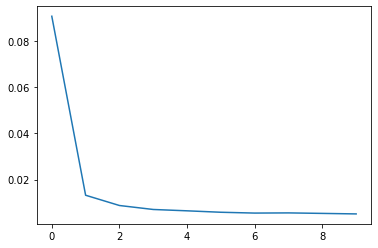

In [76]:
loss_per_epoch = regressor.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [77]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price
testing_set = dataset.iloc[test_loc:]
real_stock_price = testing_set.iloc[:, 1:2].values
print(real_stock_price,len(real_stock_price))
print(len(testing_set))

[[50.1 ]
 [50.51]
 [50.63]
 [50.24]
 [51.14]
 [51.68]
 [50.65]
 [51.66]
 [51.31]
 [51.44]
 [51.38]
 [51.74]
 [51.52]
 [51.62]
 [52.04]
 [51.38]
 [51.64]
 [51.06]
 [51.26]
 [51.42]
 [51.69]
 [52.14]
 [52.24]
 [53.31]
 [53.43]
 [53.06]
 [53.33]
 [53.28]
 [52.79]
 [53.04]
 [54.05]
 [52.6 ]
 [53.29]
 [53.26]
 [53.06]
 [53.07]
 [52.9 ]
 [53.2 ]
 [52.72]
 [52.7 ]
 [53.07]
 [52.9 ]
 [52.7 ]
 [52.85]
 [52.43]
 [52.63]
 [53.02]
 [53.35]
 [53.33]
 [53.26]
 [53.93]
 [54.75]
 [55.  ]
 [54.93]
 [55.31]
 [55.5 ]
 [55.85]
 [55.68]
 [56.2 ]
 [56.85]
 [56.65]
 [56.42]
 [56.85]
 [56.13]
 [56.16]
 [56.07]
 [58.38]
 [56.31]
 [55.9 ]
 [56.09]
 [56.52]
 [59.8 ]
 [58.5 ]
 [59.53]
 [59.23]
 [59.54]
 [59.45]
 [60.01]
 [60.8 ]
 [60.8 ]
 [60.14]
 [60.26]
 [60.62]
 [60.31]
 [59.14]
 [59.07]
 [59.54]
 [59.22]
 [59.37]
 [59.58]
 [60.55]
 [60.31]
 [59.94]
 [60.59]
 [59.79]
 [59.13]
 [59.27]
 [59.35]
 [59.  ]
 [59.59]
 [59.19]
 [59.46]
 [59.53]
 [59.48]
 [59.99]
 [60.33]
 [61.25]
 [61.28]
 [61.6 ]
 [61.43]
 [61.32]
 

In [78]:
# Getting the predicted 
dataset_total = dataset['open']
inputs = dataset_total[len(dataset_total) - len(testing_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)


In [83]:
X_test = []
for i in range(6,1008):
    X_test.append(inputs[i-6:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

<ipython-input-83-230b967f96c6>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  X_test = np.array(X_test)


IndexError: tuple index out of range

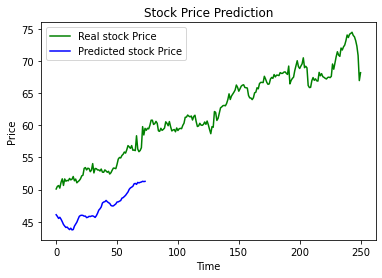

In [84]:
# Visualising the results
plt.plot(real_stock_price, color = 'green', label = 'Real stock Price ')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


# CNN LSTM
A convolutional neural network, or CNN for short, is a type of neural network developed for working with two-dimensional image data.

The CNN can be very effective at automatically extracting and learning features from one-dimensional sequence data such as univariate time series data.

A CNN model can be used in a hybrid model with an LSTM backend where the CNN is used to interpret subsequences of input that together are provided as a sequence to an LSTM model to interpret. This hybrid model is called a CNN-LSTM.

The first step is to split the input sequences into subsequences that can be processed by the CNN model. For example, we can first split our univariate time series data into input/output samples with four steps as input and one as output. Each sample can then be split into two sub-samples, each with two time steps. The CNN can interpret each subsequence of two time steps and provide a time series of interpretations of the subsequences to the LSTM model to process as input.

In [85]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [97]:
len(real_stock_price)

251

In [113]:
# define input sequence
raw_seq = real_stock_price
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)


In [114]:
print(X,y)

[[[50.1 ]
  [50.51]
  [50.63]
  [50.24]]

 [[50.51]
  [50.63]
  [50.24]
  [51.14]]

 [[50.63]
  [50.24]
  [51.14]
  [51.68]]

 [[50.24]
  [51.14]
  [51.68]
  [50.65]]

 [[51.14]
  [51.68]
  [50.65]
  [51.66]]

 [[51.68]
  [50.65]
  [51.66]
  [51.31]]

 [[50.65]
  [51.66]
  [51.31]
  [51.44]]

 [[51.66]
  [51.31]
  [51.44]
  [51.38]]

 [[51.31]
  [51.44]
  [51.38]
  [51.74]]

 [[51.44]
  [51.38]
  [51.74]
  [51.52]]

 [[51.38]
  [51.74]
  [51.52]
  [51.62]]

 [[51.74]
  [51.52]
  [51.62]
  [52.04]]

 [[51.52]
  [51.62]
  [52.04]
  [51.38]]

 [[51.62]
  [52.04]
  [51.38]
  [51.64]]

 [[52.04]
  [51.38]
  [51.64]
  [51.06]]

 [[51.38]
  [51.64]
  [51.06]
  [51.26]]

 [[51.64]
  [51.06]
  [51.26]
  [51.42]]

 [[51.06]
  [51.26]
  [51.42]
  [51.69]]

 [[51.26]
  [51.42]
  [51.69]
  [52.14]]

 [[51.42]
  [51.69]
  [52.14]
  [52.24]]

 [[51.69]
  [52.14]
  [52.24]
  [53.31]]

 [[52.14]
  [52.24]
  [53.31]
  [53.43]]

 [[52.24]
  [53.31]
  [53.43]
  [53.06]]

 [[53.31]
  [53.43]
  [53.06]
  [5

In [116]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq =2 
n_steps = 2
X = X.reshape((X.shape[0], n_seq, n_steps, n_features))

In [130]:
# univariate cnn lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
 


# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)


Epoch 1/300
8/8 [==============================] - 3s 2ms/step - loss: 3485.5965
Epoch 2/300
8/8 [==============================] - 0s 2ms/step - loss: 2021.2186
Epoch 3/300
8/8 [==============================] - 0s 3ms/step - loss: 514.9987
Epoch 4/300
8/8 [==============================] - 0s 3ms/step - loss: 20.9630
Epoch 5/300
8/8 [==============================] - 0s 3ms/step - loss: 63.0752
Epoch 6/300
8/8 [==============================] - 0s 3ms/step - loss: 22.5496
Epoch 7/300
8/8 [==============================] - 0s 3ms/step - loss: 3.3591
Epoch 8/300
8/8 [==============================] - 0s 2ms/step - loss: 6.5501
Epoch 9/300
8/8 [==============================] - 0s 2ms/step - loss: 1.4517
Epoch 10/300
8/8 [==============================] - 0s 2ms/step - loss: 1.6148
Epoch 11/300
8/8 [==============================] - 0s 3ms/step - loss: 1.3004
Epoch 12/300
8/8 [==============================] - 0s 3ms/step - loss: 0.8666
Epoch 13/300
8/8 [==============================] 

8/8 [==============================] - 0s 2ms/step - loss: 0.7670
Epoch 105/300
8/8 [==============================] - 0s 3ms/step - loss: 1.0794
Epoch 106/300
8/8 [==============================] - 0s 2ms/step - loss: 1.2014
Epoch 107/300
8/8 [==============================] - 0s 2ms/step - loss: 0.9775
Epoch 108/300
8/8 [==============================] - 0s 2ms/step - loss: 1.0528
Epoch 109/300
8/8 [==============================] - 0s 2ms/step - loss: 0.9049
Epoch 110/300
8/8 [==============================] - 0s 2ms/step - loss: 1.0091
Epoch 111/300
8/8 [==============================] - 0s 2ms/step - loss: 1.0921
Epoch 112/300
8/8 [==============================] - 0s 2ms/step - loss: 0.8405
Epoch 113/300
8/8 [==============================] - 0s 2ms/step - loss: 0.8885
Epoch 114/300
8/8 [==============================] - 0s 2ms/step - loss: 1.0079
Epoch 115/300
8/8 [==============================] - 0s 3ms/step - loss: 1.1503
Epoch 116/300
8/8 [==============================] - 0

8/8 [==============================] - 0s 2ms/step - loss: 0.9121
Epoch 207/300
8/8 [==============================] - 0s 2ms/step - loss: 0.9902
Epoch 208/300
8/8 [==============================] - 0s 2ms/step - loss: 0.9852
Epoch 209/300
8/8 [==============================] - 0s 2ms/step - loss: 1.1543
Epoch 210/300
8/8 [==============================] - 0s 2ms/step - loss: 0.8060
Epoch 211/300
8/8 [==============================] - 0s 2ms/step - loss: 0.9812
Epoch 212/300
8/8 [==============================] - 0s 2ms/step - loss: 1.2956
Epoch 213/300
8/8 [==============================] - 0s 2ms/step - loss: 1.1159
Epoch 214/300
8/8 [==============================] - 0s 2ms/step - loss: 0.8986
Epoch 215/300
8/8 [==============================] - 0s 2ms/step - loss: 1.2092
Epoch 216/300
8/8 [==============================] - 0s 2ms/step - loss: 0.7647
Epoch 217/300
8/8 [==============================] - 0s 2ms/step - loss: 1.2572
Epoch 218/300
8/8 [==============================] - 0

In [131]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_15 (TimeDis (None, None, 2, 64)       128       
_________________________________________________________________
time_distributed_16 (TimeDis (None, None, 1, 64)       0         
_________________________________________________________________
time_distributed_17 (TimeDis (None, None, 64)          0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 50)                23000     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 51        
Total params: 23,179
Trainable params: 23,179
Non-trainable params: 0
_________________________________________________________________


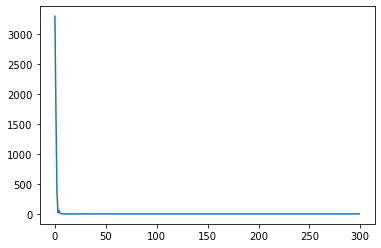

In [132]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [133]:
# demonstrate prediction
x_input = array(raw_seq[-4:])
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat = model.predict(x_input, verbose=1)
print(yhat)

1/1 [==============================] - 1s 752ms/step
[[70.711174]]


# Multi varient LSTM

In [135]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [138]:
#Read the csv file
df = pd.read_csv('data\A.csv')
print(df.head(),'\n\n',df.tail())

         date   open   high    low  close   volume Name
0  2013-02-08  45.07  45.35  45.00  45.08  1824755    A
1  2013-02-11  45.17  45.18  44.45  44.60  2915405    A
2  2013-02-12  44.81  44.95  44.50  44.62  2373731    A
3  2013-02-13  44.81  45.24  44.68  44.75  2052338    A
4  2013-02-14  44.72  44.78  44.36  44.58  3826245    A 

             date   open    high     low  close   volume Name
1254  2018-02-01  73.18  73.780  72.510  72.83  2008177    A
1255  2018-02-02  72.32  72.760  71.220  71.25  1955697    A
1256  2018-02-05  70.86  71.480  68.180  68.22  2860726    A
1257  2018-02-06  66.96  68.830  66.130  68.45  4121239    A
1258  2018-02-07  68.19  69.085  67.905  68.06  1988391    A


In [139]:
train_dates = pd.to_datetime(df['date'])
print(train_dates.tail(15))# last data

1244   2018-01-18
1245   2018-01-19
1246   2018-01-22
1247   2018-01-23
1248   2018-01-24
1249   2018-01-25
1250   2018-01-26
1251   2018-01-29
1252   2018-01-30
1253   2018-01-31
1254   2018-02-01
1255   2018-02-02
1256   2018-02-05
1257   2018-02-06
1258   2018-02-07
Name: date, dtype: datetime64[ns]


In [143]:
#Variables for training
cols = list(df)[1:5]
#Date and volume columns are not used in training. 
print(cols) 

['open', 'high', 'low', 'close']


In [144]:
#New dataframe with only training data - 5 columns
df_training = df[cols].astype(float)

<AxesSubplot:>

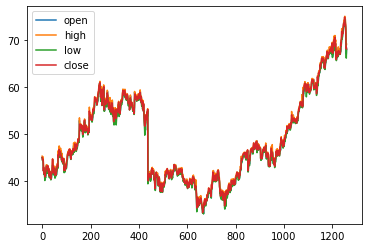

In [145]:
df_plot=df_training.tail(5000)
df_plot.plot.line()

In [147]:
# scaler for  feature scaling
scaler = StandardScaler()
scaler = scaler.fit(df_training)
df_training_scaled = scaler.transform(df_training)

In [148]:
print(df_training_scaled)

[[-0.44560191 -0.45894542 -0.41135609 -0.44677694]
 [-0.43478072 -0.47730298 -0.47117742 -0.49880304]
 [-0.47373701 -0.50213969 -0.46573912 -0.49663529]
 ...
 [ 2.34518356  2.36272004  2.10984133  2.06131491]
 [ 1.92315707  2.07655802  1.88687089  2.08624408]
 [ 2.05625773  2.10409436  2.07993066  2.04397287]]


In [149]:
trainX = []
trainY = []

In [150]:
# next no of days
next_output = 1
# Time stamp
samples = 10 

In [152]:
for i in range(samples, len(df_training_scaled) - next_output +1):
    trainX.append(df_training_scaled[i -samples:i, 0:df_training.shape[1]])
    trainY.append(df_training_scaled[i + next_output - 1:i + next_output, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (1249, 10, 4).
trainY shape == (1249, 1).


In [153]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

In [154]:
model.compile(optimizer='adam', loss='mse')

In [155]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 64)            17664     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 30,113
Trainable params: 30,113
Non-trainable params: 0
_________________________________________________________________


In [156]:
# fit the model
history = model.fit(trainX, trainY, epochs=5, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/5
71/71 [==============================] - 3s 11ms/step - loss: 0.1688 - val_loss: 0.2779
Epoch 2/5
71/71 [==============================] - 0s 6ms/step - loss: 0.0453 - val_loss: 0.0348
Epoch 3/5
71/71 [==============================] - 0s 6ms/step - loss: 0.0434 - val_loss: 0.0371
Epoch 4/5
71/71 [==============================] - 0s 7ms/step - loss: 0.0361 - val_loss: 0.0746
Epoch 5/5
71/71 [==============================] - 0s 7ms/step - loss: 0.0386 - val_loss: 0.1459


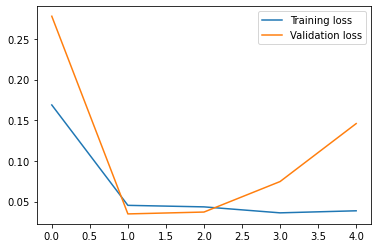

In [157]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [166]:
past = 16
days_prediction=10 

predict_period_dates = pd.date_range(list(train_dates)[-past], periods=days_prediction).tolist()
print(predict_period_dates)

[Timestamp('2018-01-17 00:00:00', freq='D'), Timestamp('2018-01-18 00:00:00', freq='D'), Timestamp('2018-01-19 00:00:00', freq='D'), Timestamp('2018-01-20 00:00:00', freq='D'), Timestamp('2018-01-21 00:00:00', freq='D'), Timestamp('2018-01-22 00:00:00', freq='D'), Timestamp('2018-01-23 00:00:00', freq='D'), Timestamp('2018-01-24 00:00:00', freq='D'), Timestamp('2018-01-25 00:00:00', freq='D'), Timestamp('2018-01-26 00:00:00', freq='D')]


In [167]:
#Make prediction
prediction = model.predict(trainX[-days_prediction:])

In [168]:
prediction_copies = np.repeat(prediction, df_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [169]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

In [170]:
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'open':y_pred_future})
df_forecast['date']=pd.to_datetime(df_forecast['date'])

In [171]:
original = df[['date', 'open']]
original['date']=pd.to_datetime(original['date'])
original = original.loc[original['date'] >= '2013-2-6']

<ipython-input-171-80e99a9e624b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['date']=pd.to_datetime(original['date'])


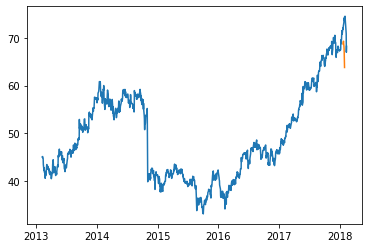

In [172]:

plt.plot(original['date'], original['open'])
plt.plot(df_forecast['date'], df_forecast['open'])